###Penghitungan dot product menggunakan code

In [ ]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

# Computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


###Penghitungan dot product menggunakan numPy

In [ ]:
import numpy as np

dot_product_1 = np.dot(input_vector, weights_1)

print(f"The dot product is: {dot_product_1}")

dot_product_2 = np.dot(input_vector, weights_2)

print(f"The dot product is: {dot_product_2}")

The dot product is: 2.1672
The dot product is: 4.1259999999999994


###Making Your First Prediction

Jaringan saraf ini hanya terdiri dari dua layer. Hanya terdapat dua operasi dalam jaringan saraf tiruan yaitu dot product dan penjumlahan, keduanya merupakan operasi linier. Jika Anda menambahkan lebih banyak layer tetapi tetap menggunakan hanya operasi linier, maka menambahkan lebih banyak lapisan tidak akan berpengaruh karena setiap lapisan akan selalu memiliki korelasi dengan masukan dari lapisan sebelumnya.

Untuk mengatasi hal ini diperlukan fungsi aktivasi yaitu fungsi non-linier yang membuat layer tengah terkadang berkorelasi dengan input dan terkadang tidak berkorelasi. Ada banyak jenis fungsi aktivasi, salah satunya RelU (rectified linear unit).

Jaringan Saraf yang dibangun pada code ini menggunakan fungsi aktivasi sigmoid.

In [ ]:
# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.7985731]


In [ ]:
# Changing the value of input_vector
input_vector = np.array([2, 1.5])

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.87101915]


###Computing the Prediction Error

Fungsi yang digunakan untuk mengukur kesalahan disebut cost function atau loss function, pada code ini fungsi yang digunakan adalah mean squared error (MSE), terdapat dua langkah yaitu:
1. Hitung selisih antara prediksi dan target
2. Kalikan hasilnya dengan sendirinya

In [ ]:
target = 0

mse = np.square(prediction - target)

print(f"Prediction: {prediction}; Error: {mse}")

Prediction: [0.87101915]; Error: [0.75867436]


###Understanding How to Reduce the Error

In [ ]:
derivative = 2 * (prediction - target)

print(f"The derivative is {derivative}")

The derivative is [1.7420383]


In [ ]:
# Updating the weights
weights_1 = weights_1 - derivative

prediction = make_prediction(input_vector, weights_1, bias)

error = (prediction - target) ** 2

print(f"Prediction: {prediction}; Error: {error}")

Prediction: [0.01496248]; Error: [0.00022388]


Untuk menentukan pecahan untuk memperbarui bobot, Anda menggunakan parameter alpha , juga disebut learning rate . Jika Anda menurunkan kecepatan belajar, maka kenaikannya lebih kecil. Jika Anda meningkatkannya, maka langkahnya lebih tinggi.

###Applying the Chain Rule

Dari code diatas dapat diketahui cara untuk mengubah weight_1 dan bias agar mengurangi error adalah dengan menggunakan turunan, tetapi fungsi ini membutuhkan fungsi lain untuk mendapatkan hasil. Karena sekarang terdapat komposisi fungsi, untuk mengambil turunan dari error terkait parameter, harus menggunakan aturan rantai dari kalkulus. Aturan rantai ini mengambil turunan parsial dari setiap fungsi, mengevaluasinya, dan mengalikan semua turunan parsial untuk mendapatkan turunan yang diinginkan.

In [ ]:
#derror_dweights = (
#    derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
#)

dapat dikatakan bahwa turunan dari y = f(x)adalah turunan dari fsehubungan dengan x. Dengan menggunakan nomenklatur ini, untuk derror_dprediction, Anda ingin mengetahui turunan dari fungsi yang menghitung galat sehubungan dengan nilai prediksi.

Lintasan terbalik ini disebut lintasan mundur . Di setiap lintasan mundur, Anda menghitung turunan parsial dari setiap fungsi, mengganti variabel dengan nilainya, dan akhirnya mengalikan semuanya.

Bagian "ambil turunan parsial, evaluasi, dan kalikan" ini adalah cara Anda menerapkan aturan rantai . Algoritma untuk memperbarui parameter jaringan saraf ini disebut backpropagation .

###Adjusting the Parameters With Backpropagation

In [ ]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

Fungsi yang menghasilkan kesalahan adalah fungsi kuadrat, dan turunan dari fungsi ini adalah 2 * x, seperti yang sebelumnya. Dengan menerapkan turunan parsial pertama ( derror_dprediction) dan masih tidak mendapatkan bias, jadi diperlukan untuk mengambil langkah mundur dan mengambil turunan prediksi sehubungan dengan lapisan sebelumnya, dprediction_dlayer1.

Prediksi tersebut merupakan hasil dari fungsi sigmoid. Turunan dari fungsi sigmoid didapatkan dengan mengalikan sigmoid(x)dan 1 - sigmoid(x). Rumus turunan ini sangat berguna karena dapat menggunakan hasil sigmoid yang telah dihitung untuk menghitung turunannya. Anda kemudian mengambil turunan parsial ini dan terus mundur.

In [ ]:
def sigmoid_deriv(x):
    return sigmoid(x) * (1-sigmoid(x))

derror_dprediction = 2 * (prediction - target)
layer_1 = np.dot(input_vector, weights_1) + bias
dprediction_dlayer1 = sigmoid_deriv(layer_1)
dlayer1_dbias = 1

derror_dbias = (
    derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
)

###Creating the Neural Network Class

In [ ]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

neural_network.predict(input_vector)

0.6115321269014683

###Training the Network With More Data

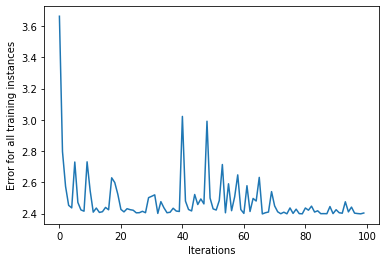

In [ ]:
# Paste the NeuralNetwork class code here
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dbias
        )
        derror_dweights = (
            derror_dprediction * dprediction_dlayer1 * dlayer1_dweights
        )

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (
            derror_dweights * self.learning_rate
        )

# (and don't forget to add the train method to the class)
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))

            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target
            )

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)

        return cumulative_errors

learning_rate = 0.1
neural_network = NeuralNetwork(learning_rate)
neural_network.predict(input_vector)

import matplotlib.pyplot as plt

input_vectors = np.array(
    [
        [3, 1.5],
        [2, 1],
        [4, 1.5],
        [3, 4],
        [3.5, 0.5],
        [2, 0.5],
        [5.5, 1],
        [1, 1],
    ]
)

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

learning_rate = 0.1

neural_network = NeuralNetwork(learning_rate)

training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.savefig("cumulative_error.png")